### Temperature Analysis I

In [1]:
# dependencies
import pandas as me
from datetime import datetime as dt
from matplotlib import style
import numpy as np
style.use('fivethirtyeight')
import matplotlib.pyplot as plt
import proplot as pplt
from scipy import stats
from scipy.stats import pearsonr

In [2]:
# 'tobs' is 'temperature observations
hi_df = me.read_csv('Resources/hawaii_measurements.csv')

In [3]:
# convert the date column format from string to datetime
hi_df['date'] = me.to_datetime(hi_df['date'], format='%Y-%m-%d')

In [4]:
# Set the date column as the DataFrame index
hi_df.set_index('date', inplace=True)

In [5]:
# Drop the date column

### Compare June and December data across all years 

In [6]:
# filter data for desired months and describe

# get data for the month of june across all years, convert to dataframe with tobs data only
jun_df = me.DataFrame(hi_df[hi_df.index.month==6], columns=['tobs'])
print(f'June Data:\n{jun_df.describe()}')

# new line to separate results
print(f'\n')

# get data for the month of december across all years, convert to dataframe with tobs data only
dec_df = me.DataFrame(hi_df[hi_df.index.month==12], columns=['tobs'])
print(f'December Data:\n{dec_df.describe()}')

June Data:
              tobs
count  1700.000000
mean     74.944118
std       3.257417
min      64.000000
25%      73.000000
50%      75.000000
75%      77.000000
max      85.000000


December Data:
              tobs
count  1517.000000
mean     71.041529
std       3.745920
min      56.000000
25%      69.000000
50%      71.000000
75%      74.000000
max      83.000000


In [7]:
# identify the average temperature for June
jun_tobs_avg = jun_df['tobs'].mean()
print(f'The average teperature for June across all years is {jun_tobs_avg:.3f}°F')

The average teperature for June across all years is 74.944°F


In [8]:
# identify the average temperature for December
dec_tobs_avg = dec_df['tobs'].mean()
print(f'The average teperature for December across all years is {dec_tobs_avg:.3f}°F')

The average teperature for December across all years is 71.042°F


In [9]:
# create collections of temperature data
jundec_df = me.concat([jun_df, dec_df], axis=0, join='outer', ignore_index=False)
jundec_df = jundec_df.dropna()
jundec_df

,tobs
date,
2010-06-01,78
2010-06-02,76
2010-06-03,78
2010-06-04,76
2010-06-05,77
...,...
2016-12-27,71
2016-12-28,71
2016-12-29,69


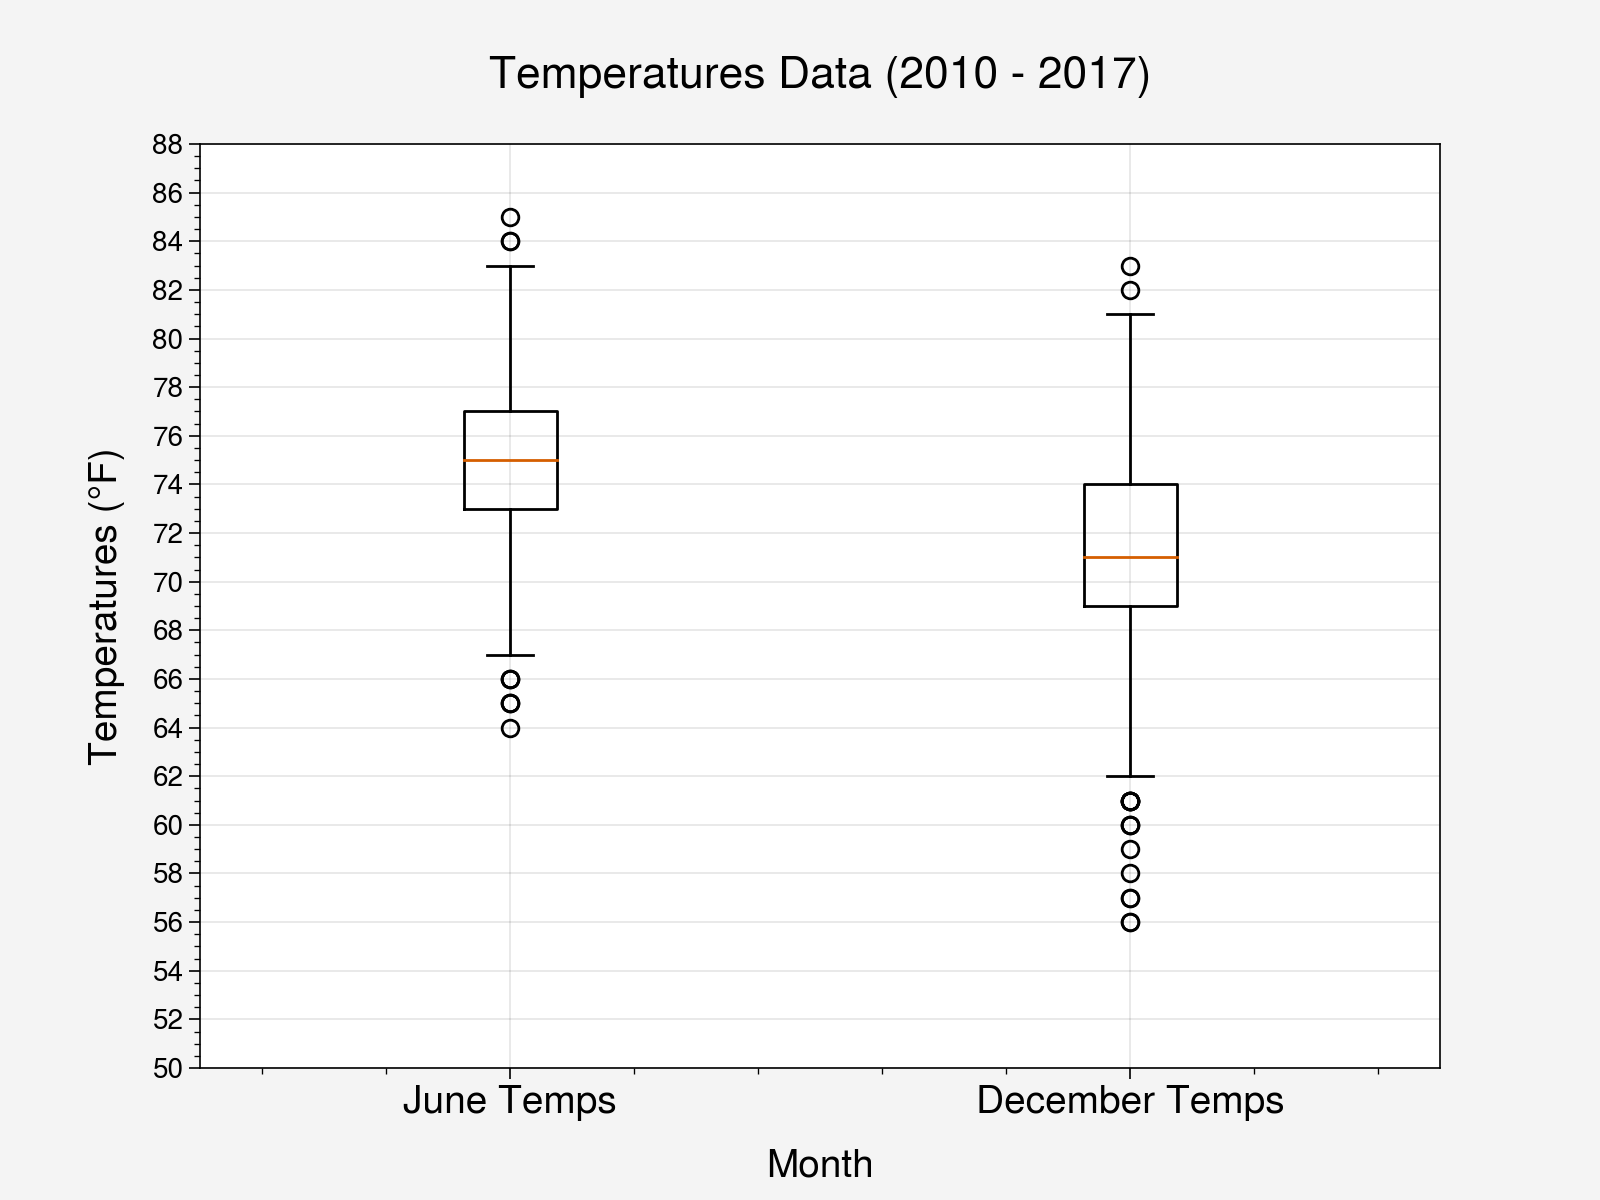

In [15]:
# box and whisker chart comparing temperature data from all Junes and all Decembers
x_labels = ['June Temps', 'December Temps']
temps = [jun_df['tobs'], dec_df['tobs']]
fix, ax = plt.subplots(figsize=(8,6))
ax.boxplot(temps, labels=x_labels)

# labels and ticks
plt.xticks(fontsize=14)
plt.yticks(fontsize=10)

ax.set_yticks(np.arange(50, 90, step=2.0))
ax.set_title('Temperatures Data (2010 - 2017)',fontsize=16, pad=20)
ax.set_ylabel('Temperatures (°F)',fontsize=14, labelpad=10)
ax.set_xlabel("Month",fontsize=14, labelpad=10)

plt.savefig('Images/jun_dec_temp_data.png')
plt.show()


In [11]:
# unpaired t-test to examine the data
# unpaired t-test used as data from June and December are independent from each other
results = stats.ttest_ind(jun_df['tobs'], dec_df['tobs'])
print(results)


Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)


#### Analysis

Based on observable temperatures, the majority of June temperatures range between 73°F and 77°F with a high of 83°F, a low of 67°F and an average of 75°F. December can range from a high of 81°F and a low of 62°F with a majority of the temperatures falling between 69° and 74°F with an average of 73°F. On those merits alone, either June of December would be fine months to visit Hawaii. Looking further though, December has more temperatures below the low of 62°F. 

If you like colder weather, as I do, December lends itself to being more comfortable. June does not have as many outliers but already starts out hotter on average and has a better chance of exceeding the upper average limit of 77°F. December has a wider range of temperatures but you ar most likely going to be around 70°F and at very worst around 56°F. Again, I am all for cooler weather. Ultimately though, there is no meaningful difference in temperatures comparing June and December as with the probability of such huge temperature differences between June and December are very near zero. 

To get a better stance on which month has ideal weather, an analysis on precipiation would be the next step.